In [5]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

In [7]:
df = pd.read_csv(r'C:\Users\Hp\Downloads\Car Rental Review Collection - Rental_Car_review.csv')

In [9]:
print(df.head())

   ID car_name  Consumer reviews  \
0   1  audi A1               0.0   
1   2  audi A6               4.6   
2   3  audi A4               4.6   
3   4  audi A3               5.0   
4   5  audi Q3               5.0   

                                             review1  \
0                                              Blank   
1  I had looked at the Mercedes E Class, BMW 5 Se...   
2  Best car I've ever owned, hands down. I am a 3...   
3  I am so impressed with the new A3, it’s quick,...   
4  While I am reviewing the Q3 I got a mere five ...   

                                             review2  \
0                                              Blank   
1  This car seems to eat oil. I bought this vehic...   
2  Traded in my 2005.5 A-4, which I dearly loved ...   
3  I must I love my car, we originally went in lo...   
4  I transport my most price possessions in this ...   

                                             review3  
0                                              Blank  

In [13]:
pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/626.3 kB ? eta -:--:--
   --------------------------------- ------ 524.3/626.3 kB 4.2 MB/s eta 0:00:01
   --------------------------------- ------ 524.3/626.3 kB 4.2 MB/s eta 0:00:01
   -------------------------------------- 626.3/626.3 kB 728.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [15]:
from textblob import TextBlob

In [23]:
# Combine all review columns into a single "combined_reviews" column
df['combined_reviews'] = df[['review1', 'review2', 'review3']].apply(lambda x: ' '.join(x.dropna()), axis=1)

In [25]:
# Function to classify sentiment into a rating from 1 to 5
def get_sentiment_score(review_text):
    blob = TextBlob(review_text)
    # Get the polarity score: -1 (negative) to 1 (positive)
    sentiment_score = blob.sentiment.polarity
    # Map polarity score to a rating between 1 to 5
    if sentiment_score <= -0.5:
        return 1
    elif sentiment_score > -0.5 and sentiment_score <= 0:
        return 2
    elif sentiment_score > 0 and sentiment_score <= 0.3:
        return 3
    elif sentiment_score > 0.3 and sentiment_score <= 0.6:
        return 4
    else:
        return 5

In [27]:
# Apply the function to the combined reviews
df['sentiment_rating'] = df['combined_reviews'].apply(get_sentiment_score)

In [29]:
# Display the updated DataFrame with the sentiment rating
print(df[['ID', 'car_name', 'combined_reviews', 'sentiment_rating']].head())

   ID car_name                                   combined_reviews  \
0   1  audi A1                                  Blank Blank Blank   
1   2  audi A6  I had looked at the Mercedes E Class, BMW 5 Se...   
2   3  audi A4  Best car I've ever owned, hands down. I am a 3...   
3   4  audi A3  I am so impressed with the new A3, it’s quick,...   
4   5  audi Q3  While I am reviewing the Q3 I got a mere five ...   

   sentiment_rating  
0                 2  
1                 3  
2                 3  
3                 4  
4                 3  


In [31]:
# Display the first few rows of the updated DataFrame
print(df[['ID', 'car_name', 'combined_reviews', 'sentiment_rating']].head())

   ID car_name                                   combined_reviews  \
0   1  audi A1                                  Blank Blank Blank   
1   2  audi A6  I had looked at the Mercedes E Class, BMW 5 Se...   
2   3  audi A4  Best car I've ever owned, hands down. I am a 3...   
3   4  audi A3  I am so impressed with the new A3, it’s quick,...   
4   5  audi Q3  While I am reviewing the Q3 I got a mere five ...   

   sentiment_rating  
0                 2  
1                 3  
2                 3  
3                 4  
4                 3  


In [33]:
# Count the occurrences of each sentiment rating
rating_counts = df['sentiment_rating'].value_counts().sort_index()
print(rating_counts)

sentiment_rating
2    62
3    51
4    18
5     3
Name: count, dtype: int64


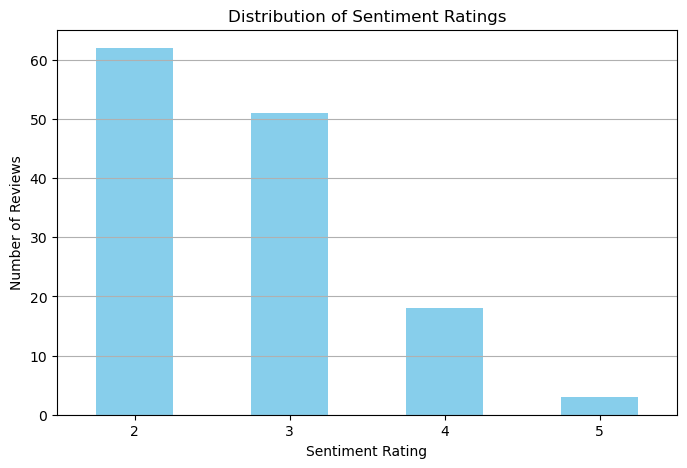

In [35]:
import matplotlib.pyplot as plt

# Create a bar plot of sentiment ratings
plt.figure(figsize=(8, 5))
rating_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Sentiment Ratings')
plt.xlabel('Sentiment Rating')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [37]:
output_file_path = r'C:\Users\Hp\Downloads\Car_Rental_Review_Analysis.csv'  # Update this path as needed
df[['ID', 'car_name', 'combined_reviews', 'sentiment_rating']].to_csv(output_file_path, index=False)
print(f"File saved at: {r'C:\Users\Hp\Downloads\Car_Rental_Review_Analysis.csv'}")

File saved at: C:\Users\Hp\Downloads\Car_Rental_Review_Analysis.csv


In [43]:
pwd

'C:\\Users\\Hp'

In [45]:
import os
print(os.getcwd())

C:\Users\Hp
